Importation of packages

In [2]:
import filter_data  # class containing filter methods 
import date_handling  # ￼class containing date related methods
import tweet_analysis  # class containing the method for the content analysis of the tweets. 
import constants  # import global constants
import plot # plotting functions 
import dictionnaries # defined dictionaries
import numpy as np # numpy for array handling
import percentage # compute percentage

# Reload each module
import importlib

importlib.reload(filter_data)
importlib.reload(date_handling)
importlib.reload(tweet_analysis)
importlib.reload(constants)
importlib.reload(plot)
importlib.reload(dictionnaries)



<module 'dictionnaries' from '/home/loris/Desktop/populist_russians_bots/dictionnaries.py'>

Definition of constants 


In [3]:
START_DATE = np.datetime64('2014-07-01') # Date of the first published tweet in English 
END_DATE = np.datetime64('2018-06-01') # Date of the last published tweet in English 


Filter the data : 
- Keep only tweets written in english 
- Remove links in the tweets
- Remove columns that we do not need 
- Reformat dates

In [10]:
# Warning: This cell needs to be run only once. 

# Define the set of column indices to keep
COLUMN_INDICES = {1, 2, 5, 13}

# Call the function with the input file name and column indices
for i in range(1, 14): 
    input_path= constants.RAW_DATA_PATH.format(i)
    output_path= constants.PRE_PROCESSED_DATA_PATH.format(i)
    filter_data.filter_csv(input_path, output_path, COLUMN_INDICES, 4, "English") # Keep only tweets in english 
    filter_data.extract_date_columns(output_path, output_path)
    filter_data.remove_links(output_path, output_path)
    filter_data.convert_to_lowercase(output_path, output_path)

Get the array of dates that span the period of the tweets

In [6]:
date_array = date_handling.get_date_array(START_DATE, END_DATE)

(Optional) Plot the number of tweets over the period

In [7]:
nb_of_tweets_per_day = tweet_analysis.get_nb_of_tweets_per_day(date_array)
print(nb_of_tweets_per_day.sum(axis=0))


2116719.0


In [13]:
%matplotlib qt

plot.plot_result(date_array, nb_of_tweets_per_day, START_DATE, END_DATE)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open zink: /usr/lib/dri/zink_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

qt.qpa.wayland: Failed to initialize EGL display 3001


Dictionary analysis


In [14]:
nb_of_tweets_filtered_with_dic = tweet_analysis.dataset_analysis(dictionnaries.dic_rooduijn_pauwels, date_array)


Plot result of dictionary analysis

In [15]:
plot.plot_result(date_array,nb_of_tweets_filtered_with_dic, START_DATE, END_DATE)

Get percentage of tweets with at least one words over the total nb of tweets

In [16]:
percentage = percentage.percentage_of_tweets(nb_of_tweets_filtered_with_dic, nb_of_tweets_per_day)
plot.plot_result(date_array, percentage, START_DATE, END_DATE)

Extract the dictionaries of populist expressions

In [12]:
anti_elitism_dictionary = dictionnaries.extract_grundle_translation_dictionary("anti-elitism")
people_centrism_dictionary = dictionnaries.extract_grundle_translation_dictionary("people-centrism")
sovereignty_dictionary = dictionnaries.extract_grundle_translation_dictionary("sovereignty")
print("anti-elitism dictionary contains {} words".format(len(anti_elitism_dictionary)))
print("people_centrism dictionary contains {} words".format(len(people_centrism_dictionary)))
print("sovereignty dictionary contains {} words".format(len(sovereignty_dictionary)))

anti-elitism dictionary contains 7288 words
people_centrism dictionary contains 3135 words
sovereignty dictionary contains 426 words


Perform the anti-elitism analysis 

In [5]:
nb_of_tweets_anti_elitist = tweet_analysis.dataset_analysis(anti_elitism_dictionary,date_array)

processing file 1
4.9114227294921875e-05
processing file 2
131.72613978385925
processing file 3
257.0437738895416
processing file 4
395.72542905807495
processing file 5
521.0596373081207
processing file 6
629.6913123130798
processing file 7
771.8664197921753
processing file 8
872.5399751663208
processing file 9
953.3470366001129
processing file 10
1032.5981602668762
processing file 11
1146.304619550705
processing file 12
1268.4046595096588
processing file 13
1380.129861831665


Store result in storage

In [8]:
np.save('./nb_of_tweets_anti_elitist.npy', nb_of_tweets_anti_elitist)

Retrieve result to memory

In [5]:
nb_of_tweets_anti_elitist = np.load('./nb_of_tweets_anti_elitist.npy')

Plot results

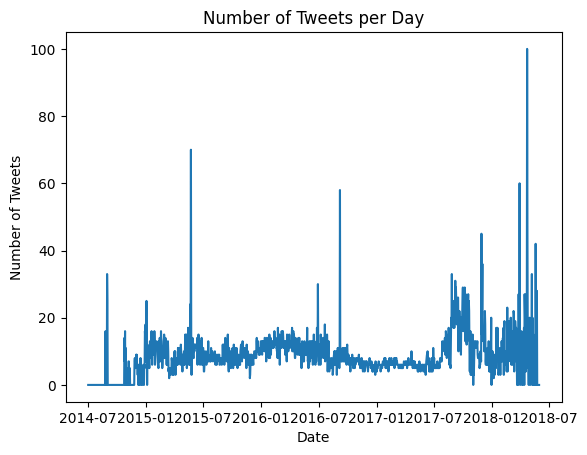

8.677374301675977


In [10]:
percentage_anti_elitist = percentage.percentage_of_tweets(nb_of_tweets_anti_elitist, nb_of_tweets_per_day)
plot.plot_result(date_array, percentage_anti_elitist, START_DATE, END_DATE)
mean_percentage = np.mean(percentage_anti_elitist)

print(mean_percentage)

Perform the people_centrism analysis 


In [13]:
nb_of_tweets_people_centrism = tweet_analysis.dataset_analysis(people_centrism_dictionary,date_array)
np.save('./nb_of_tweets_people_centrism.npy', nb_of_tweets_people_centrism)

processing file 1
8.440017700195312e-05
processing file 2
60.74401068687439
processing file 3
119.36048793792725
processing file 4
183.60057997703552
processing file 5
241.99017453193665
processing file 6
290.83711409568787
processing file 7
352.8362989425659
processing file 8
397.9904148578644
processing file 9
434.26134753227234
processing file 10
469.16220331192017
processing file 11
518.4147465229034
processing file 12
572.2147982120514
processing file 13
622.5426344871521
